# DATA SCIENCE INTERN @BHARAT INTERN

## AUTHOR : ROSHIK YADA
## TASK 1 : STOCK PREDICTION
### PURPOSE : Predicting the stock price of a company using Long Short-Term Memory (LSTM)

### Dataset
#### In this dataset it contains historical data about Google's stock prices and various related attributes. This dataset has 14 columns, each representing a specific piece of information, and there are 1257 rows, with each row containing the corresponding values for those attributes. Essentially, it's a structured dataset with information about Google's stock performance and related metrics over a period of time.
#### 

In [1]:
#import Libraries
import numpy as np # For linear algebra
import pandas as pd # Data preprocessing
import matplotlib.pyplot as plt # Data visualization library
import seaborn as sns # Data visualization library
%matplotlib inline
#To ignore warnings
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')  
from sklearn.preprocessing import MinMaxScaler # For Normalization
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

C:\Users\YADA ROSHIK\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Load data
df=pd.read_csv('GOOG.csv')

In [3]:
#default first five rows
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [4]:
#Default Last 5 rows 
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0
1257,GOOG,2021-06-11 00:00:00+00:00,2513.93,2526.990,2498.2900,2524.92,1262309,2513.93,2526.990,2498.2900,2524.92,1262309,0.0,1.0


In [5]:
#what are the columns in dataset
df.columns

Index(['symbol', 'date', 'close', 'high', 'low', 'open', 'volume', 'adjClose',
       'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'],
      dtype='object')

In [6]:
#shape of dataset
df.shape

(1258, 14)

In [7]:
#Describing the dataset
df.describe

<bound method NDFrame.describe of      symbol                       date    close      high        low     open  \
0      GOOG  2016-06-14 00:00:00+00:00   718.27   722.470   713.1200   716.48   
1      GOOG  2016-06-15 00:00:00+00:00   718.92   722.980   717.3100   719.00   
2      GOOG  2016-06-16 00:00:00+00:00   710.36   716.650   703.2600   714.91   
3      GOOG  2016-06-17 00:00:00+00:00   691.72   708.820   688.4515   708.65   
4      GOOG  2016-06-20 00:00:00+00:00   693.71   702.480   693.4100   698.77   
...     ...                        ...      ...       ...        ...      ...   
1253   GOOG  2021-06-07 00:00:00+00:00  2466.09  2468.000  2441.0725  2451.32   
1254   GOOG  2021-06-08 00:00:00+00:00  2482.85  2494.495  2468.2400  2479.90   
1255   GOOG  2021-06-09 00:00:00+00:00  2491.40  2505.000  2487.3300  2499.50   
1256   GOOG  2021-06-10 00:00:00+00:00  2521.60  2523.260  2494.0000  2494.01   
1257   GOOG  2021-06-11 00:00:00+00:00  2513.93  2526.990  2498.2900  2524.

In [8]:
#summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [9]:
#Checking null values
df.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [10]:
df = df[['date','open','close']] #Extracting required columns
df['date'] = pd.to_datetime(df['date'].apply(lambda x: x.split()[0])) #Converting object dtype of date column to datetime dtype
df.set_index('date',drop=True,inplace=True) #Setting date column as index
df.head(10)

,open,close
date,,
2016-06-14,716.48,718.27
2016-06-15,719.00,718.92
2016-06-16,714.91,710.36
2016-06-17,708.65,691.72
2016-06-20,698.77,693.71
2016-06-21,698.40,695.94
2016-06-22,699.06,697.46
2016-06-23,697.45,701.87
2016-06-24,675.17,675.22


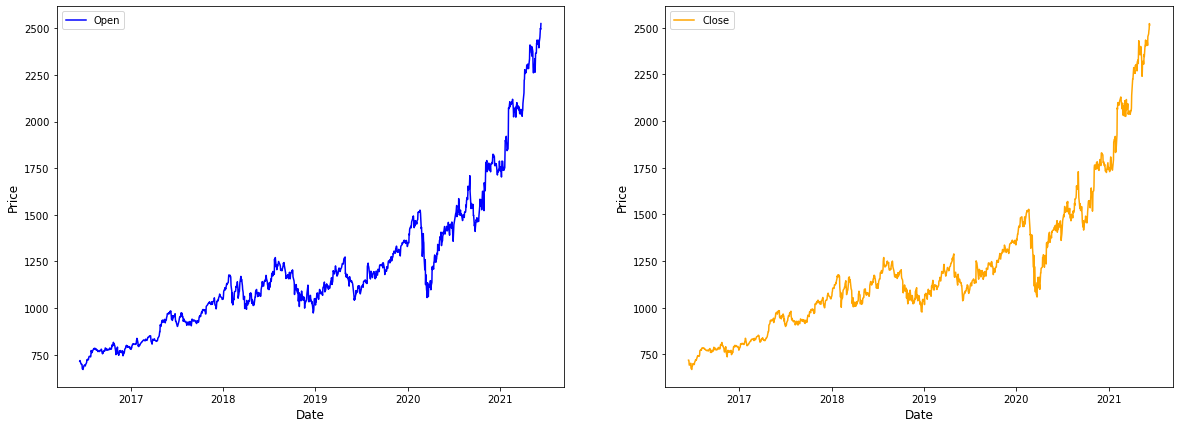

In [11]:
# plotting open and closing price on date index
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['open'],label='Open',color='blue')
ax[0].set_xlabel('Date',size=12)
ax[0].set_ylabel('Price',size=12)
ax[0].legend()

ax[1].plot(df['close'],label='Close',color='orange')
ax[1].set_xlabel('Date',size=12)
ax[1].set_ylabel('Price',size=12)
ax[1].legend()

fig.show()

In [12]:
#Data preprocessing
#Normalizing all the values of all columns using MinMaxScaler
MMS = MinMaxScaler()
df[df.columns] = MMS.fit_transform(df)
df.head(10)

,open,close
date,,
2016-06-14,0.024532,0.026984
2016-06-15,0.025891,0.027334
2016-06-16,0.023685,0.022716
2016-06-17,0.020308,0.012658
2016-06-20,0.014979,0.013732
2016-06-21,0.014779,0.014935
2016-06-22,0.015135,0.015755
2016-06-23,0.014267,0.018135
2016-06-24,0.002249,0.003755


In [13]:
#Splitting the data into training and test set
training_size = round(len(df) * 0.75) #Selecting 75% for training & 25% for testing
training_size

944

In [14]:
train_data = df[:training_size]
test_data  = df[training_size:]

train_data.shape, test_data.shape

((944, 2), (314, 2))

In [15]:
#Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [16]:
train_seq, train_label = create_sequence(train_data) 
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((894, 50, 2), (894, 2), (264, 50, 2), (264, 2))

In [17]:
#Creating LSTM model
#Imported Sequential from keras.models 
model = Sequential()

#Importing Dense, Dropout, LSTM, Bidirectional from keras.layers 
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))
model.add(Dropout(0.1)) 
model.add(LSTM(units=50))
model.add(Dense(2))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
#Fitting the model by iterating the dataset over 100 times(100 epochs)
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/100
28/28 [==============================] - 10s 123ms/step - loss: 0.0089 - mean_absolute_error: 0.0661 - val_loss: 0.0156 - val_mean_absolute_error: 0.1024
Epoch 2/100
28/28 [==============================] - 2s 58ms/step - loss: 8.4416e-04 - mean_absolute_error: 0.0237 - val_loss: 0.0061 - val_mean_absolute_error: 0.0616
Epoch 3/100
28/28 [==============================] - 2s 69ms/step - loss: 4.5424e-04 - mean_absolute_error: 0.0158 - val_loss: 0.0032 - val_mean_absolute_error: 0.0436
Epoch 4/100
28/28 [==============================] - 2s 63ms/step - loss: 4.4960e-04 - mean_absolute_error: 0.0157 - val_loss: 0.0028 - val_mean_absolute_error: 0.0404
Epoch 5/100
28/28 [==============================] - 2s 61ms/step - loss: 4.1708e-04 - mean_absolute_error: 0.0150 - val_loss: 0.0043 - val_mean_absolute_error: 0.0517
Epoch 6/100
28/28 [==============================] - 2s 56ms/step - loss: 4.5640e-04 - mean_absolute_error: 0.0155 - val_loss: 0.0038 - val_mean_absolute_error: 0

28/28 [==============================] - 2s 60ms/step - loss: 1.9955e-04 - mean_absolute_error: 0.0104 - val_loss: 0.0026 - val_mean_absolute_error: 0.0401
Epoch 50/100
28/28 [==============================] - 2s 55ms/step - loss: 2.0183e-04 - mean_absolute_error: 0.0106 - val_loss: 0.0035 - val_mean_absolute_error: 0.0488
Epoch 51/100
28/28 [==============================] - 2s 57ms/step - loss: 2.0952e-04 - mean_absolute_error: 0.0104 - val_loss: 0.0024 - val_mean_absolute_error: 0.0385
Epoch 52/100
28/28 [==============================] - 2s 56ms/step - loss: 1.9193e-04 - mean_absolute_error: 0.0100 - val_loss: 0.0042 - val_mean_absolute_error: 0.0537
Epoch 53/100
28/28 [==============================] - 2s 55ms/step - loss: 1.9898e-04 - mean_absolute_error: 0.0104 - val_loss: 0.0020 - val_mean_absolute_error: 0.0350
Epoch 54/100
28/28 [==============================] - 2s 55ms/step - loss: 1.9779e-04 - mean_absolute_error: 0.0102 - val_loss: 0.0010 - val_mean_absolute_error: 0.0241

28/28 [==============================] - 2s 55ms/step - loss: 1.1929e-04 - mean_absolute_error: 0.0078 - val_loss: 5.1124e-04 - val_mean_absolute_error: 0.0172
Epoch 98/100
28/28 [==============================] - 2s 60ms/step - loss: 1.3599e-04 - mean_absolute_error: 0.0084 - val_loss: 3.8764e-04 - val_mean_absolute_error: 0.0150
Epoch 99/100
28/28 [==============================] - 2s 59ms/step - loss: 1.3228e-04 - mean_absolute_error: 0.0083 - val_loss: 3.4940e-04 - val_mean_absolute_error: 0.0137
Epoch 100/100
28/28 [==============================] - 2s 56ms/step - loss: 1.2112e-04 - mean_absolute_error: 0.0079 - val_loss: 7.1223e-04 - val_mean_absolute_error: 0.0205


In [19]:
#Predicting the values after running the model
test_predicted = model.predict(test_seq)
test_predicted[:5]

9/9 [==============================] - 1s 16ms/step


array([[0.40634474, 0.40545002],
       [0.40662298, 0.40568176],
       [0.4023235 , 0.4013931 ],
       [0.4041825 , 0.40323743],
       [0.4067667 , 0.40576097]], dtype=float32)

In [20]:
#Inversing normalization/scaling on predicted data 
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[1424.3306, 1419.6968],
       [1424.8464, 1420.1262],
       [1416.8756, 1412.1779],
       [1420.322 , 1415.5961],
       [1425.1129, 1420.2731]], dtype=float32)

In [21]:
#VISUALIZING ACTUAL VS PREDICTED DATA
# Merging actual and predicted data for better visualization
df_merge = pd.concat([df.iloc[-264:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],
                                       index=df.iloc[-264:].index)], axis=1)

In [22]:
# Inversing normalization/scaling 
df_merge[['open','close']] = MMS.inverse_transform(df_merge[['open','close']])
df_merge.head()

,open,close,open_predicted,close_predicted
date,,,,
2020-05-27,1417.25,1417.84,1424.330566,1419.696777
2020-05-28,1396.86,1416.73,1424.846436,1420.126221
2020-05-29,1416.94,1428.92,1416.875610,1412.177856
2020-06-01,1418.39,1431.82,1420.322021,1415.596069
2020-06-02,1430.55,1439.22,1425.112915,1420.273071


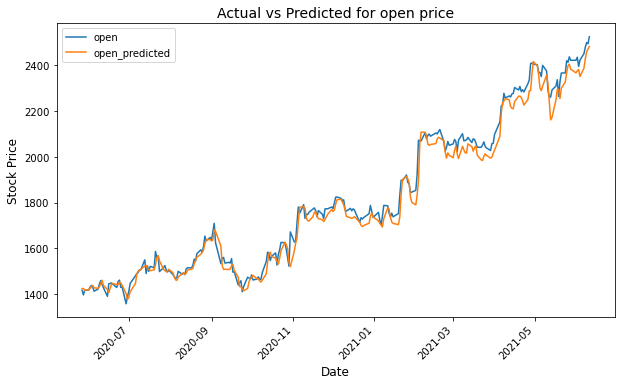

In [23]:
# plotting the actual open and predicted open prices on date index
df_merge[['open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=12)
plt.ylabel('Stock Price',size=12)
plt.title('Actual vs Predicted for open price',size=14)
plt.show()

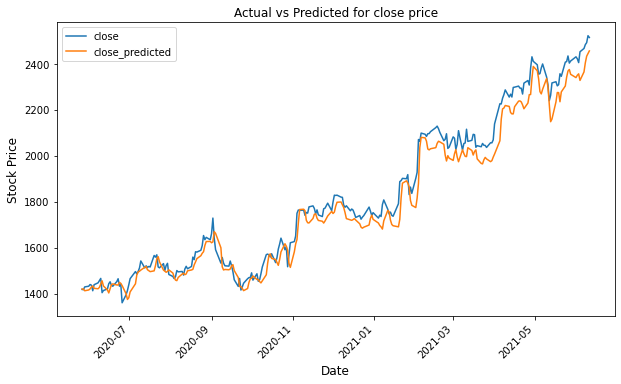

In [24]:
# plotting the actual close and predicted close prices on date index 
df_merge[['close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=12)
plt.ylabel('Stock Price',size=12)
plt.title('Actual vs Predicted for close price',size=12)
plt.show()

In [25]:
#PREDICTING UPCOMING 10 DAYS
#Creating a dataframe and adding 10 days to existing index 

df_merge = df_merge.append(pd.DataFrame(columns=df_merge.columns,
                                        index=pd.date_range(start=df_merge.index[-1], periods=11, freq='D', closed='right')))
df_merge['2021-06-09':'2021-06-16']

,open,close,open_predicted,close_predicted
2021-06-09,2499.5,2491.4,2459.033203,2432.510742
2021-06-10,2494.01,2521.6,2470.844482,2443.967773
2021-06-11,2524.92,2513.93,2482.303467,2455.431641
2021-06-12,NaN,NaN,NaN,NaN
2021-06-13,NaN,NaN,NaN,NaN
2021-06-14,NaN,NaN,NaN,NaN
2021-06-15,NaN,NaN,NaN,NaN
2021-06-16,NaN,NaN,NaN,NaN


In [26]:
#Creating a DataFrame and filling values of open and close column
upcoming_prediction = pd.DataFrame(columns=['open','close'],index=df_merge.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [27]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 39ms/step


In [28]:
#Inversing Normalization/scaling
upcoming_prediction[['open','close']] = MMS.inverse_transform(upcoming_prediction[['open','close']])

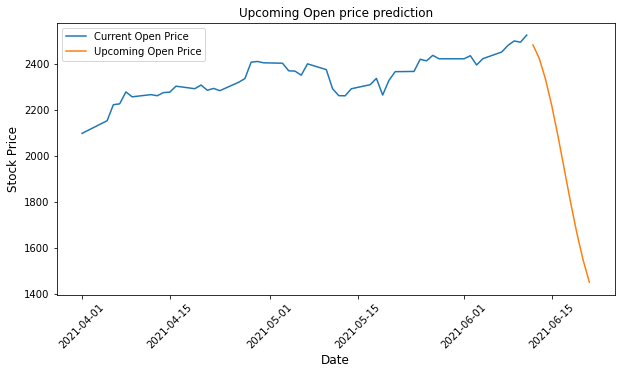

In [29]:
#Plotting Upcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=12)
ax.set_ylabel('Stock Price',size=12)
ax.set_title('Upcoming Open price prediction',size=12)
ax.legend()
fig.show()

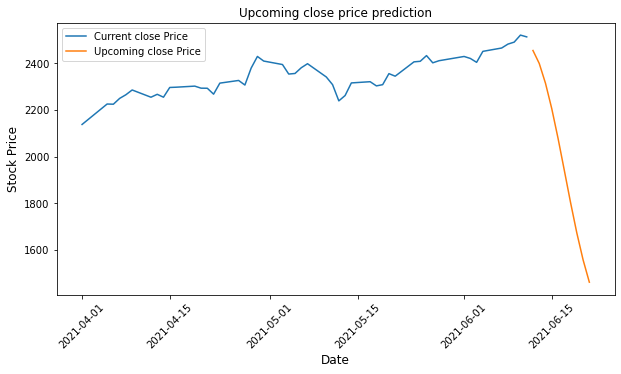

In [30]:
# plotting Upcoming Close price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=12)
ax.set_ylabel('Stock Price',size=12)
ax.set_title('Upcoming close price prediction',size=12)
ax.legend()
fig.show()

### The above code implements a predictive model for Google's stock price using LSTM neural networks. It begins by importing necessary libraries, loading the Google stock dataset, and providing data insights. Data preprocessing involves scaling and splitting the data into training and test sets. The LSTM model is constructed with two LSTM layers, dropout, and an output layer for price predictions. Training is performed over 100 epochs. The code visualizes actual and predicted stock prices for both opening and closing values. Furthermore, it predicts stock prices for the next ten days, providing insights into potential future trends. This comprehensive approach showcases how LSTM models can be employed to analyze historical data, make predictions, and visualize results for stock price forecasting.